<a href="https://colab.research.google.com/github/msdokania/Habitability-Prediction-of-Exoplanets/blob/main/CSE575_DataProcess_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
import os
import itertools
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.feature_selection import RFECV

In [4]:
df = pd.read_csv("/content/PHL_dataset.csv")
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/My Drive/Datasets/PHL_dataset.csv")
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [5]:
Null_values=list(zip(df.columns.values.tolist(),df.isnull().sum().tolist()))

Null_values


[('P_NAME', 0),
 ('P_STATUS', 0),
 ('P_MASS', 2450),
 ('P_MASS_ERROR_MIN', 2581),
 ('P_MASS_ERROR_MAX', 2581),
 ('P_RADIUS', 909),
 ('P_RADIUS_ERROR_MIN', 943),
 ('P_RADIUS_ERROR_MAX', 943),
 ('P_YEAR', 0),
 ('P_UPDATED', 0),
 ('P_PERIOD', 110),
 ('P_PERIOD_ERROR_MIN', 241),
 ('P_PERIOD_ERROR_MAX', 241),
 ('P_SEMI_MAJOR_AXIS', 1681),
 ('P_SEMI_MAJOR_AXIS_ERROR_MIN', 2485),
 ('P_SEMI_MAJOR_AXIS_ERROR_MAX', 2484),
 ('P_ECCENTRICITY', 2668),
 ('P_ECCENTRICITY_ERROR_MIN', 3077),
 ('P_ECCENTRICITY_ERROR_MAX', 3077),
 ('P_INCLINATION', 3204),
 ('P_INCLINATION_ERROR_MIN', 3236),
 ('P_INCLINATION_ERROR_MAX', 3238),
 ('P_OMEGA', 3302),
 ('P_OMEGA_ERROR_MIN', 3355),
 ('P_OMEGA_ERROR_MAX', 3355),
 ('P_TPERI', 3567),
 ('P_TPERI_ERROR_MIN', 3576),
 ('P_TPERI_ERROR_MAX', 3576),
 ('P_ANGULAR_DISTANCE', 1687),
 ('P_IMPACT_PARAMETER', 2639),
 ('P_IMPACT_PARAMETER_ERROR_MIN', 2641),
 ('P_IMPACT_PARAMETER_ERROR_MAX', 2641),
 ('P_TEMP_MEASURED', 4043),
 ('P_GEO_ALBEDO', 4048),
 ('P_GEO_ALBEDO_ERROR_MIN', 

In [6]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [7]:
j=0
for i in df.columns.values.tolist():
    if Null_values[j][1]>=df.shape[0]*0.1225:      
        df = df.drop(columns=i)
    j=j+1

#print(df.shape[0])
m = np.core.defchararray.find(df.columns.values.astype(str), 'ERROR') >= 0
df=df.loc[:,~m]

df=df.dropna()

df[df != 'nan']
df.head()

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_NAME,S_RA,S_DEC,S_MAG,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,2007,2014-05-14,326.03000,Radial Velocity,11 Com,185.17928,17.792868,4.740,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,2009,2018-09-06,516.21997,Radial Velocity,11 UMi,229.27454,71.823898,5.016,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,2008,2014-05-14,185.84000,Radial Velocity,14 And,352.82257,39.236198,5.227,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,2002,2018-09-06,1773.40000,Radial Velocity,14 Her,242.60130,43.817646,6.610,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,1996,2018-09-06,798.50000,Radial Velocity,16 Cyg B,295.46655,50.517525,6.250,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


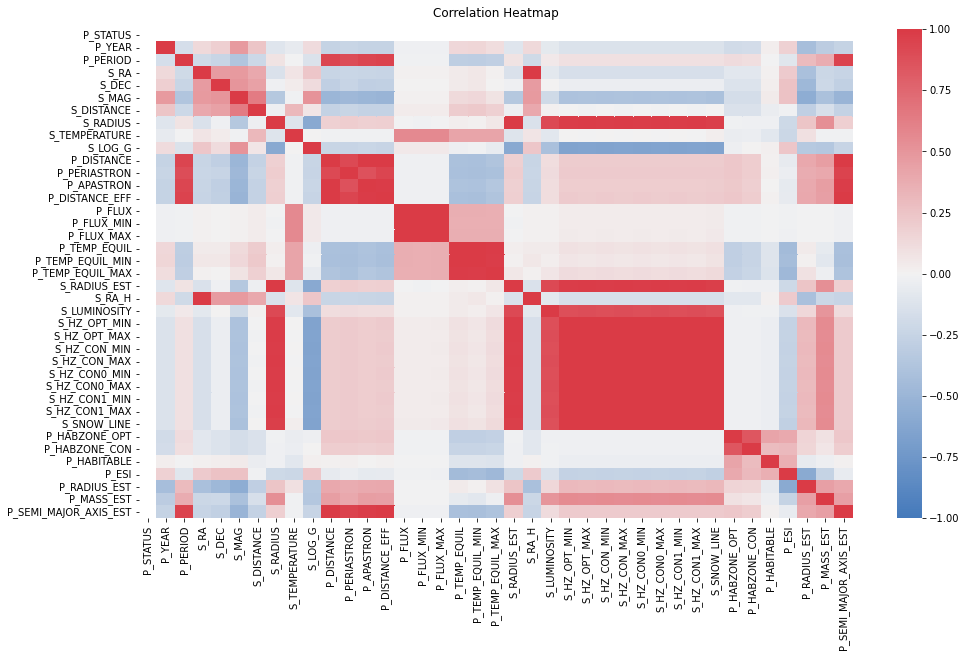

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_NAME,S_RA,S_DEC,S_MAG,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,2007,2014-05-14,326.03000,Radial Velocity,11 Com,185.17928,17.792868,4.740,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,2009,2018-09-06,516.21997,Radial Velocity,11 UMi,229.27454,71.823898,5.016,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,2008,2014-05-14,185.84000,Radial Velocity,14 And,352.82257,39.236198,5.227,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,2002,2018-09-06,1773.40000,Radial Velocity,14 Her,242.60130,43.817646,6.610,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,1996,2018-09-06,798.50000,Radial Velocity,16 Cyg B,295.46655,50.517525,6.250,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [8]:
plt.figure(figsize=(16,9))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=False, cmap=cmap)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()
df.head()

In [9]:
df = df.drop(columns=['P_DISTANCE', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MAX', 'P_FLUX_MIN',
                      'P_TEMP_EQUIL_MAX', 'P_TEMP_EQUIL_MIN','S_RA','S_DEC','S_RA_H','S_RA_T','S_DEC_T', 'S_RADIUS_EST', 'S_HZ_OPT_MIN',
                      'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX','S_HZ_CON0_MIN', 'S_HZ_CON0_MAX',
                      'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE'])

df["P_TYPE_TEMP"] = LabelEncoder().fit_transform(df["P_TYPE_TEMP"])
df["P_TYPE"] = LabelEncoder().fit_transform(df["P_TYPE"])
df["S_TYPE_TEMP"] = LabelEncoder().fit_transform(df["S_TYPE_TEMP"])
df["P_DETECTION"] = LabelEncoder().fit_transform(df["P_DETECTION"])

df.head()

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_NAME,S_MAG,S_DISTANCE,S_RADIUS,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,2007,2014-05-14,326.03000,2,11 Com,4.740,93.37,19.00,...,0,1,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,2009,2018-09-06,516.21997,2,11 UMi,5.016,125.72,29.79,...,0,1,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,2008,2014-05-14,185.84000,2,14 And,5.227,75.59,11.00,...,0,1,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,2002,2018-09-06,1773.40000,2,14 Her,6.610,17.94,0.93,...,0,0,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,1996,2018-09-06,798.50000,2,16 Cyg B,6.250,21.15,1.13,...,1,2,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


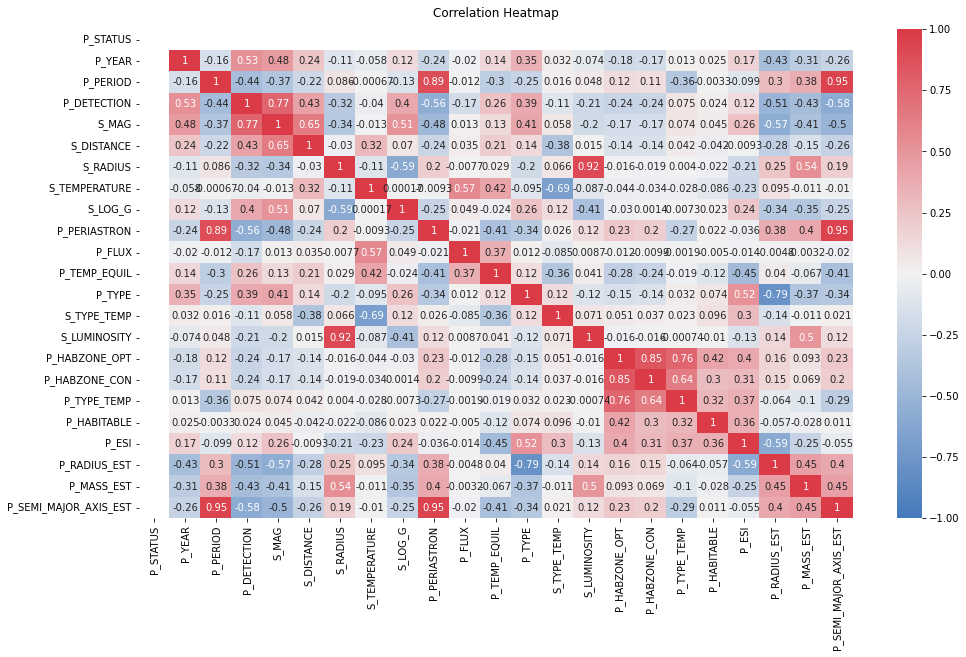

In [10]:
plt.figure(figsize=(16,9))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=True, cmap=cmap)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [11]:
fig1 = px.density_heatmap(df, x='S_MAG', y='S_LOG_G', z='P_HABITABLE')
fig2 = px.density_heatmap(df,x='P_TYPE',y='P_TYPE_TEMP',z='P_HABITABLE')
fig3 = px.scatter(df,x='P_TEMP_EQUIL',y='P_ESI',color='P_HABITABLE')
fig4 = px.density_heatmap(df,x='P_SEMI_MAJOR_AXIS_EST',y='S_TYPE_TEMP',z='P_HABITABLE')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [ ]:
'''
v = 2
for i in range(len(df)):
  if (df["P_HABITABLE"]==2).any():
    df["P_HABITABLE"] = 1
    '''

'\nv = 2\nfor i in range(len(df)):\n  if (df["P_HABITABLE"]==2).any():\n    df["P_HABITABLE"] = 1\n    '

In [12]:
df.columns.values.tolist()

['P_NAME',
 'P_STATUS',
 'P_YEAR',
 'P_UPDATED',
 'P_PERIOD',
 'P_DETECTION',
 'S_NAME',
 'S_MAG',
 'S_DISTANCE',
 'S_RADIUS',
 'S_TEMPERATURE',
 'S_LOG_G',
 'S_ALT_NAMES',
 'P_PERIASTRON',
 'P_FLUX',
 'P_TEMP_EQUIL',
 'P_TYPE',
 'S_TYPE_TEMP',
 'S_LUMINOSITY',
 'P_HABZONE_OPT',
 'P_HABZONE_CON',
 'P_TYPE_TEMP',
 'P_HABITABLE',
 'P_ESI',
 'S_CONSTELLATION',
 'S_CONSTELLATION_ABR',
 'S_CONSTELLATION_ENG',
 'P_RADIUS_EST',
 'P_MASS_EST',
 'P_SEMI_MAJOR_AXIS_EST']

In [13]:
df.head()

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_NAME,S_MAG,S_DISTANCE,S_RADIUS,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,2007,2014-05-14,326.03000,2,11 Com,4.740,93.37,19.00,...,0,1,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,2009,2018-09-06,516.21997,2,11 UMi,5.016,125.72,29.79,...,0,1,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,2008,2014-05-14,185.84000,2,14 And,5.227,75.59,11.00,...,0,1,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,2002,2018-09-06,1773.40000,2,14 Her,6.610,17.94,0.93,...,0,0,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,1996,2018-09-06,798.50000,2,16 Cyg B,6.250,21.15,1.13,...,1,2,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [14]:
Target = df.P_HABITABLE
'''
for i in range(len(Target)):
  if Target[i]==2:
    Target[i] = 1
    '''
Predictors = df.drop(columns=['P_NAME','P_YEAR','P_DETECTION','S_NAME','S_ALT_NAMES','S_CONSTELLATION','S_CONSTELLATION_ABR',
                              'S_CONSTELLATION_ENG','P_UPDATED','P_HABITABLE'])

X_tr1, X_tst1, Y_tr1, Y_tst1 = train_test_split(Predictors,Target, random_state=0)
X_tr2, X_tst2, Y_tr2, Y_tst2 = train_test_split(Predictors,Target, random_state=10)
X_tr3, X_tst3, Y_tr3, Y_tst3 = train_test_split(Predictors,Target, random_state=42)

#df.head()
Predictors.head()

,P_STATUS,P_PERIOD,S_MAG,S_DISTANCE,S_RADIUS,S_TEMPERATURE,S_LOG_G,P_PERIASTRON,P_FLUX,P_TEMP_EQUIL,P_TYPE,S_TYPE_TEMP,S_LUMINOSITY,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,3.0,326.03000,4.740,93.37,19.00,4742.0,2.31,0.99201,101.011410,799.44963,0,4,163.546800,0,0,1,0.083813,12.082709,6165.86330,1.29
1,3.0,516.21997,5.016,125.72,29.79,4213.0,1.93,1.40760,107.351180,819.07569,0,4,250.492940,0,0,1,0.082414,12.229641,4684.78480,1.53
2,3.0,185.84000,5.227,75.59,11.00,4813.0,2.63,0.83000,84.446427,772.30746,0,3,58.175144,0,0,1,0.081917,12.848516,1525.57440,0.83
3,3.0,1773.40000,6.610,17.94,0.93,5338.0,4.45,1.84590,0.078887,131.38424,0,4,0.629171,0,0,0,0.145241,12.865261,1481.07850,2.93
4,3.0,798.50000,6.250,21.15,1.13,5750.0,4.36,0.53120,0.618972,202.22783,0,3,1.250596,1,1,2,0.368627,13.421749,565.73385,1.66


In [15]:
Predictors.columns.values.tolist()

['P_STATUS',
 'P_PERIOD',
 'S_MAG',
 'S_DISTANCE',
 'S_RADIUS',
 'S_TEMPERATURE',
 'S_LOG_G',
 'P_PERIASTRON',
 'P_FLUX',
 'P_TEMP_EQUIL',
 'P_TYPE',
 'S_TYPE_TEMP',
 'S_LUMINOSITY',
 'P_HABZONE_OPT',
 'P_HABZONE_CON',
 'P_TYPE_TEMP',
 'P_ESI',
 'P_RADIUS_EST',
 'P_MASS_EST',
 'P_SEMI_MAJOR_AXIS_EST']

In [16]:
Predictors

,P_STATUS,P_PERIOD,S_MAG,S_DISTANCE,S_RADIUS,S_TEMPERATURE,S_LOG_G,P_PERIASTRON,P_FLUX,P_TEMP_EQUIL,P_TYPE,S_TYPE_TEMP,S_LUMINOSITY,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,3.0,326.03000,4.740,93.37,19.000,4742.0,2.310,0.99201,101.011410,799.44963,0,4,163.546800,0,0,1,0.083813,12.082709,6165.863300,1.290
1,3.0,516.21997,5.016,125.72,29.790,4213.0,1.930,1.40760,107.351180,819.07569,0,4,250.492940,0,0,1,0.082414,12.229641,4684.784800,1.530
2,3.0,185.84000,5.227,75.59,11.000,4813.0,2.630,0.83000,84.446427,772.30746,0,3,58.175144,0,0,1,0.081917,12.848516,1525.574400,0.830
3,3.0,1773.40000,6.610,17.94,0.930,5338.0,4.450,1.84590,0.078887,131.38424,0,4,0.629171,0,0,0,0.145241,12.865261,1481.078500,2.930
4,3.0,798.50000,6.250,21.15,1.130,5750.0,4.360,0.53120,0.618972,202.22783,0,3,1.250596,1,1,2,0.368627,13.421749,565.733850,1.660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,3.0,162.87000,3.500,3.60,0.793,5344.0,-4.995,0.44116,1.613943,285.39203,4,3,0.459516,1,0,2,0.737081,1.809973,3.931532,0.538
4036,3.0,636.13000,3.500,3.60,0.793,5344.0,-4.995,1.12056,0.261590,181.31867,4,3,0.459516,0,0,0,0.538662,1.809973,3.931532,1.334
4037,3.0,20.00000,3.500,3.60,0.793,5344.0,-4.995,0.12502,26.024396,575.03789,4,3,0.459516,0,0,1,0.342664,1.178565,1.751232,0.133
4038,3.0,49.41000,3.500,3.60,0.793,5344.0,-4.995,0.18711,7.996323,424.09232,4,3,0.459516,0,0,1,0.446574,1.193246,1.830689,0.243


In [17]:
Target

0       0
1       0
2       0
3       0
4       0
       ..
4035    1
4036    0
4037    0
4038    0
4039    0
Name: P_HABITABLE, Length: 3317, dtype: int64

In [18]:
def draw_confusion_matrix(y_predicted, Y_actual, title):
    cm = confusion_matrix(Y_actual, y_predicted, normalize='all')
    print("cm shape",cm.shape[0])
    print("cm shape",cm.shape[1])
    
    plt.figure()
    plt.imshow(cm, cmap=plt.cm.OrRd_r)
    plt.title(title)
    #plt.colorbar()
    classes = ("non habitable", "Conservatively habitable", "Optimitistically habitable")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    error1= (1-np.diag(cm).sum())*100
    print("Error : ", error1)
    #mean_error = np.mean([error1,error2,error3])
    #print("Errors = ({0:.2f}, {1:.2f}, {2:.2f})%".format(error1,error2,error3))
    #print("Mean Error = {:.2f} %".format(mean_error))

Errors = (0.24, 0.12, 0.12)%
Mean Error = 0.16 %


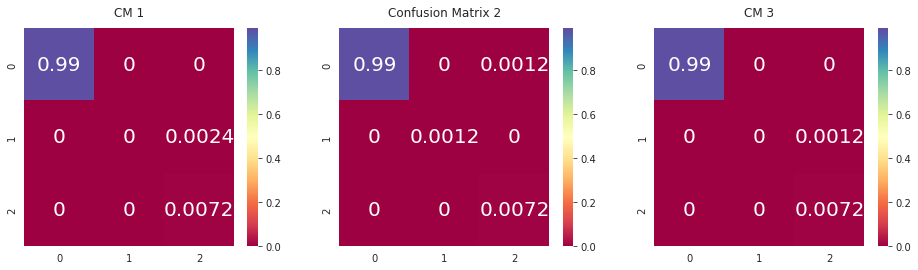

In [19]:
SVCC = SVC(kernel='linear',C=100)

SVCC.fit(X_tr1,Y_tr1)
Y_pred1 = SVCC.predict(X_tst1)
SVCC.fit(X_tr3,Y_tr3)
Y_pred2 = SVCC.predict(X_tst2)
SVCC.fit(X_tr3,Y_tr3)
Y_pred3 = SVCC.predict(X_tst3)


conf_mat1 = confusion_matrix(Y_tst1,Y_pred1, normalize='all')
conf_mat2 = confusion_matrix(Y_tst2,Y_pred2, normalize='all')
conf_mat3 = confusion_matrix(Y_tst3,Y_pred3, normalize='all')

sns.set_style(style='dark')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
sns.heatmap(ax=ax1, data=conf_mat1, vmin=np.min(conf_mat1.all()),vmax=np.max(conf_mat1), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax1.set_title("CM 1", fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax2,data=conf_mat2, vmin=np.min(conf_mat2.all()),vmax=np.max(conf_mat2), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax2.set_title('Confusion Matrix 2', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax3,data=conf_mat3, vmin=np.min(conf_mat3.all()),vmax=np.max(conf_mat3), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax3.set_title("CM 3", fontdict={'fontsize':12}, pad=12)

error1= (1-np.diag(conf_mat1).sum())*100
error2= (1-np.diag(conf_mat2).sum())*100
error3= (1-np.diag(conf_mat3).sum())*100
mean_error = np.mean([error1,error2,error3])
print("Errors = ({0:.2f}, {1:.2f}, {2:.2f})%".format(error1,error2,error3))
print("Mean Error = {:.2f} %".format(mean_error))
      



In [20]:
svm_accuracy_1 = accuracy_score(Y_tst1, Y_pred1)
f1_1 = f1_score(Y_tst1, Y_pred1, average='weighted')
print('Accuracy for randon_state 0 (Linear Kernel): ', "%.2f" % (svm_accuracy_1*100))
print('F1 for randon_state 0 (Linear Kernel): ', "%.2f" % (f1_1*100))

Accuracy for randon_state 0 (Linear Kernel):  99.76
F1 for randon_state 0 (Linear Kernel):  99.66


Errors = (0.96, 0.84, 0.84)%
Mean Error = 0.88 %


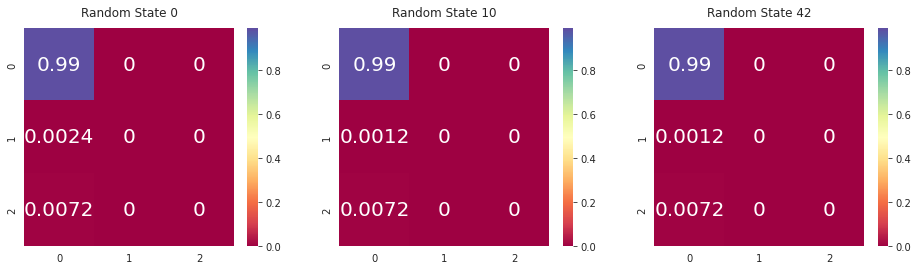

In [21]:

clf2 = svm.SVC(kernel='rbf', gamma=10, class_weight = 'balanced')
clf2.fit(X_tr1, Y_tr1)
y_predicted_1 = clf2.predict(X_tst1);
clf2.fit(X_tr2, Y_tr2)
y_predicted_2 = clf2.predict(X_tst2);
clf2.fit(X_tr3, Y_tr3)
y_predicted_3 = clf2.predict(X_tst3);

conf_mat1 = confusion_matrix(Y_tst1,y_predicted_1, normalize='all')
conf_mat2 = confusion_matrix(Y_tst2,y_predicted_2, normalize='all')
conf_mat3 = confusion_matrix(Y_tst3,y_predicted_3, normalize='all')

sns.set_style(style='dark')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
sns.heatmap(ax=ax1, data=conf_mat1, vmin=np.min(conf_mat1.all()),vmax=np.max(conf_mat1), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax1.set_title("Random State 0", fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax2,data=conf_mat2, vmin=np.min(conf_mat2.all()),vmax=np.max(conf_mat2), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax2.set_title('Random State 10', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax3,data=conf_mat3, vmin=np.min(conf_mat3.all()),vmax=np.max(conf_mat3), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax3.set_title("Random State 42", fontdict={'fontsize':12}, pad=12)

error1= (1-np.diag(conf_mat1).sum())*100
error2= (1-np.diag(conf_mat2).sum())*100
error3= (1-np.diag(conf_mat3).sum())*100
mean_error = np.mean([error1,error2,error3])
print("Errors = ({0:.2f}, {1:.2f}, {2:.2f})%".format(error1,error2,error3))
print("Mean Error = {:.2f} %".format(mean_error))

In [22]:
rbf_accuracy = accuracy_score(Y_tst1, y_predicted_1)
rbf_f1 = f1_score(Y_tst1, y_predicted_1, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

rbf_accuracy = accuracy_score(Y_tst2, y_predicted_2)
rbf_f1 = f1_score(Y_tst2, y_predicted_2, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

rbf_accuracy = accuracy_score(Y_tst3, y_predicted_3)
rbf_f1 = f1_score(Y_tst3, y_predicted_3, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  99.04
F1 (RBF Kernel):  98.56
Accuracy (RBF Kernel):  99.16
F1 (RBF Kernel):  98.74
Accuracy (RBF Kernel):  99.16
F1 (RBF Kernel):  98.74
